#### Problem 1.1

We have 2 opaque bags, each containing 2 balls. One bag has 2 black balls and the other has a black and a white ball . You pick a bag at random and then pick one of the balls in that bag at random. When you look at the ball it is black. You now pick the second ball from that same bag. What is the probability that this ball is also black? [Hint: Use Bayes' Theorem: $\mathbb P[A \ and \ B] = \mathbb P[A | B] \mathbb P[B] = \mathbb P[B | A] \mathbb P[A]$]

**参考**：

由题有两个包，一个包里有两个黑球，另一个包里有一个黑球和一个白球，先随机取一个包，再随机从这个包里随机取一个球，当发现第一取出的球是黑球时，再从这个包里再取一次球，现在问第二次取出的球也是黑色的概率?  利用贝叶斯公式即可，记第一次拿到黑球的事件为 $A$，连续两次拿到黑球的事件为 $B$，所以概率 $p$ 为

$$
\begin{aligned}
p &= \mathbb P(B|A) \\
&= \frac {\mathbb P(AB)}{\mathbb P(A)} \\
&= \frac{\mathbb P(B)}{\mathbb P(A)} \\
&= \frac{\frac {1}{2} \times \frac {1}{2}}{\frac {1}{2} + \frac {1}{2} \times \frac {1}{2}}\\
&= \frac {2}{3}
\end{aligned}
$$

#### Problem 1.2

Consider the perceptron in two dimensions: $h(x)=\text{sign}(w^Tx)$ where $w = [w_0 , w_1 , w_2]^T$ and $x = [1, x_1 , x_2 ]^T$. Technically, $x$ has three coordinates, but we call this perceptron two-dimensional because the first coordinate is fixed at 1.

(a) Show that the regions on the plane where $h(x) = +1$ and $h(x) = -1$ are separated by a line. If we express this line by the equation $x_2 = ax_1 + b$,what are the slope $a$ and intercept $b$ in terms of $w_0, w_1, w_2$?

(b) Draw a picture for the cases $w = [1, 2, 3]^T$ and $w = - [1 , 2, 3]^T$.

In more than two dimensions, the +1 and - 1 regions are separated by a $hyperplane$, the generalization of a line.

**参考**：

(a) 由解析几何知识，$w^Tx=0$ 直线的一侧每个点 $w^Tx>0$，另一侧的每个点 $w^Tx<0$，因此 $h(x)=+1$ 和 $h(x)=−1$ 被一条直线所分开。
直线方程为

$$
w^Tx=w_0+w_1x_1+w_2x_2=0
$$

所以当 $w_2 \ne 0$ 时

$$
x_2=-\frac {w_0}{w_2} - \frac {w_1}{w_2}x_1
$$

(b)用Python作图

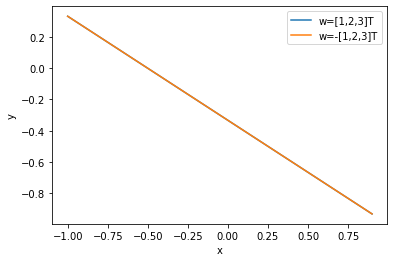

In [1]:
%run codes/problem1.2(b).py

##### (b)

可以看到两条直线重合，这是由直线的表达式 $x_2=-\frac {w_0}{w_2} - \frac {w_1}{w_2}x_1$ 决定的。

#### Problem 1.3

Prove that the PLA eventually converges to a linear separator for separable data. The following steps will guide you through the proof. Let $w^*$ be an optimal set of weights (one which separates the data). The essential idea in this proof is to show that the PLA weights $w(t)$ get "more aligned" with $w^*$ with every iteration. For simplicity, assume that $w(0) = 0$.

(a) Let $\rho = {\min}_{1 \le n \le N} y_n(w^{*T} x_n)$. Show that $\rho > 0$.

(b) Show that $w^T(t)w^* \ge w^T(t-1)w^*+\rho$, and conclude that $w^T(t)w^* \ge t \rho$.

&emsp; [Hint: Use induction.]

(c) Show that $||w (t)||^2 \le ||w(t-1)||^2 + ||x(t-1)||^2$.

&emsp; [Hint: $y(t-1) · (w^T(t-1)x(t-1)) \le 0$ because $x(t - 1)$ was misclassified by $w(t-1)$].

(d) Show by induction that $||w(t)||^2 \le tR^2$ , where $R = {\max}_{1 \le n \le N} ||x_n||$.

(e) Using (b) and (d), show that

$$
\frac {w^T(t)}{||w(t)||}w^* \ge \sqrt{t} · \frac {\rho}{R}
$$

&emsp; and hence prove that

$$
t \le \frac {R^2||w^*||^2}{\rho^2}
$$

&emsp; [Hint: $\frac {w^T(t)w^*}{||w(t)|| \ ||w^*||} \le 1$. Why?]

In practice, PLA converges more quickly than the bound $\frac {R^2||w^*||^2}{\rho^2}$ suggests. Nevertheless, because we do not know $\rho$ in advance, we can't determine the number of iterations to convergence, which does pose a problem if the data is non-separable.

**参考**：

(a) 因为数据可分，所以对于 $\forall \ n(1 \le n \le N), \ y_n(w^{*T}x_n)>0$，且由于 $N$ 有限，所以 $\rho = {\min}_{1 \le n \le N} y_n(w^{*T}x_n)>0$

(b)先回顾下更新规则:

$$
对于y(t) \ne \text {sign}(w^T(t)x(t))的数据，更新规则是w(t+1) = w(t) + y(t)x(t)
$$

因此

$$
\begin{aligned}
w^T(t)w^* &= (w^T(t-1)+y(t-1)x^T(t-1))w^* \\ &= w^T(t-1)w^*+y(t-1)x^T(t-1)w^* \\
&= w^T(t-1)w^*+y(t-1)x(t-1)w^{*T} \\ &\ge w^T(t-1)w^*+\rho
\end{aligned}
$$

这里 $y(t-1)x^T(t-1)w^*=y(t-1)x(t-1)w^{*T}$ 是因为 $x^T(t-1)w^*$ 是一个实数，所以它的转置 $x(t-1)w^{*T}$ 等于它本身，最后一步是因为

$$
y(t-1)x(t-1)w^{*T} \ge {\min}_{1 \le n \le N} y_n(w^{*T}x_n)=\rho
$$

再来证明 $w^T(t)w^* \ge t\rho$，利用数学归纳法：

+ 当 $t=0$ 时，$w^T(t)w^*=w^T(0)w^*=0,t\rho=0$，因此当 $t=0$ 时结论成立。
+ 假设当 $t=k$ 时结论成立，当 $t=k+1$ 时，由之前证明的结论知

$$
w^T(k+1)w^* \ge w^T(k)w^*+\rho \ge k\rho + \rho=(k+1)\rho
$$

所以当 $t=k+1$ 时结论也成立，综上有 $w^T(t)w^* \ge t\rho$。

(c)对 $w(t+1)=w(t)+y(t)x(t)$ 两边取模的平方，注意这里 $||x||^2=x^Tx,x \in \mathbb R^n$：

$$
\begin{aligned}
||w(t+1)||^2 &= ||w(t)+y(t)x(t)||^2 \\ 
&= \Big( w(t)+y(t)x(t) \Big)^T \Big( w(t)+y(t)x(t) \Big) \\ 
&= w^T(t)w(t)+x^T(t)y^T(t)w(t)+w^T(t)y(t)x(t)+x^T(t)y^T(t)y(t)x(t)
\end{aligned}
$$

利用实数的转置等于其本身以及 $y(t) = \pm 1$ 可得

$$
x^T(t)y^T(t)w(t) = y(t)x^T(t)w(t) = w^T(t)y(t)x(t) \\
x^T(t)y^T(t)y(t)x(t) = y(t)x^T(t)y(t)x(t) = y^2(t)x^T(t)x(t) = x^T(t)x(t)
$$

所以

$$
\begin{aligned}
||w(t+1)||^2 &= w^T(t)w(t)+2y(t)x^T(t)w(t)+x^T(t)x(t) \\
&= ||w(t)||^2 + ||x(t)||^2 + 2y(t)x^T(t)w(t)
\end{aligned}
$$

因为 $(x(t), y(t))$ 被误分，所以有

$$
y(t)x^T(t)w(t) \le 0
$$

因此

$$
\begin{aligned}
||w(t+1)||^2 &= ||w(t)||^2 + ||x(t)||^2 + 2y(t)x^T(t)w(t) \\
&\le ||w(t)||^2 + ||x(t)||^2
\end{aligned}
$$

(d) 利用数学归纳法进行证明，注意 $w(0)=0$：

+ 当 $t=1$ 时，

$$
||w(1)||^2 \le ||w(0)||^2 + ||x(0)||^2 = ||x(0)||^2 \le R^2
$$

+ 假设当 $t=k$ 时结论成立，当 $t=k+1$ 时，

$$
||w(k+1)||^2 \le ||w(k)||^2 + ||x(t)||^2 \le kR^2+R^2 = (k+1)R^2
$$

因此当 $t=k+1$ 时结论也成立，综上有 $||w(t)||^2 \le tR^2$，其中 $R = {\max}_{1 \le n \le N} ||x_n||$。

(e)由(d)有 $||w(t)||^2 \le tR^2$，所以

$$
||w(t)|| \le \sqrt {t} R
$$

由(b)有 $w^T(t)w^* \ge t\rho$，所以

$$
\frac {w^T(t)w^*}{||w(t)||} \ge \frac {t\rho}{\sqrt {t} R} = \sqrt {t} \frac {\rho}{R}
$$

由Cauthy-Schwarz不等式有

$$
w^T(t)w^* \le ||w(t)|| \ ||w^*||
$$

因此

$$
\sqrt {t} \frac {\rho}{R} \le ||w^*|| \\
t \le \frac {||w^*||^2 R^2}{\rho^2}
$$

这意味着 $t$ 是一个有限的数，所以PLA一定会收敛。

#### Problem 1.4

In Exercise 1.4, we use an artificial data set to study the perceptron learning algorithm . This problem leads you to explore the algorithm further with data sets of different sizes and dimensions.

(a) Generate a linearly separable data set of size 20 as indicated in Exercise 1.4. Plot the examples $\{ (x_n , y_n) \}$ as well as the target function $f$ on a plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot.

(b) Run the perceptron learning algorithm on the data set above. Report the number of updates that the algorithm takes before converging. Plot the examples $\{ (x_n , y_n) \}$ , the target function $f$, and the final hypothesis $g$ in the same figure. Comment on whether $f$ is close to $g$.

(c) Repeat everything in (b) with another randomly generated data set of size 20. Compare your results with (b).

(d) Repeat everything in (b) with another randomly generated data set of size 100. Compare your results with (b).

(e) Repeat everything in (b) with another randomly generated data set of size 1000. Compare your results with (b).

(f) Modify the algorithm such that it takes $x_n \in \R^{10}$ instead of $\R^2$. Randomly generate a linearly separable data set of size 1000 with $x_n \in \R^{10}$ and feed the data set to the algorithm. How many updates does the algorithm take to converge?

(g) Repeat the algorithm on the same data set as (f) for 100 experiments. In the iterations of each experiment, pick $x(t)$ randomly instead of deterministically. Plot a histogram for the number of updates that the algorithm takes to converge.

(h) Summarize your conclusions with respect to accuracy and running time as a function of $N$ and $d$.

**参考**：

(a),(b),(c)这三题和Exercise 1.4基本一致，稍微不同的是需要画出目标函数f以及更新次数

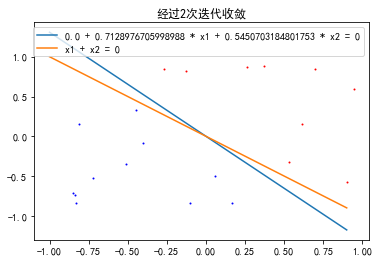

In [2]:
%run codes/problem1.4(a-c).py

##### (d)

将数据量由20增加到100：

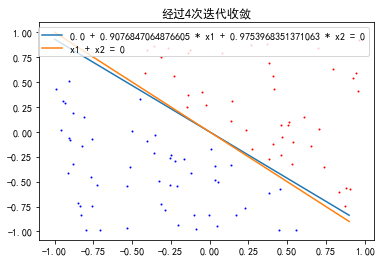

In [3]:
%run codes/problem1.4(d).py

##### (e)

将数据量由100增加到1000：

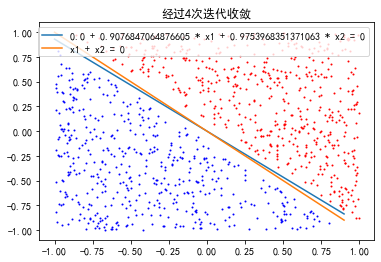

In [4]:
%run codes/problem1.4(e).py

##### (f)

将数据维度由2增加到10：

In [5]:
%run codes/problem1.4(f).py

迭代次数为244


##### (g)

重复(f)100次，做出直方图：

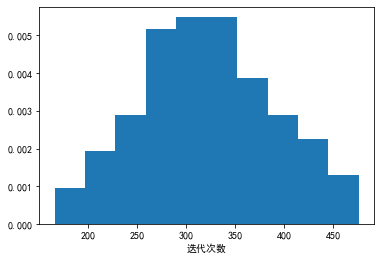

In [6]:
%run codes/problem1.4(g).py

##### (h)

由上有，随着 $N$ 和 $d$ 的增加，迭代次数会增加。

#### Problem 1.5

The perceptron learning algorithm works like this: In each iteration $t$, pick a random $(x(t), y(t))$ and compute the 'signa' $s(t) = w^T(t)x(t)$. If $y(t) · s(t) \le 0$, update $w$ by

$$
w(t+1) \gets w(t) + y(t)·x(t)
$$

One may argue that this algorithm does not take the 'closeness' between $s(t)$ and $y(t)$ into consideration. Let's look at another perceptron learning algorithm: In each iteration, pick a random $(x(t), y(t))$ and compute $s(t)$. If $y(t) · s(t) \le 1$, update $w$ by

$$
w(t+1) \gets w(t) + \eta \cdot (y(t)-s(t)) \cdot x(t)
$$

where $\eta$ is a constant. That is, if $s(t)$ agrees with $y(t)$ well (their product is > 1), the algorithm does nothing. On the other hand, if $s(t)$ is further from $y(t)$, the algorithm changes $w(t)$ more. In this problem, you are asked to implement this algorithm and study its perfrmance.

(a) Generate a training data set of size 100 similar to that used in Exercise 1.4. Generate a test data set of size 10000 from the same process. To get $g$, run the algorithm above with $\eta = 100$ on the training data set, until a maximum of 1000 updates has been reached. Plot the training data set, the target function $f$, and the final hypothesis $g$ on the same figure. Report the error on the test set.

(b) Use the data set in (a) and redo everything with $\eta = 1$.

(c) Use the data set in (a) and redo everything with $\eta = 0.01$.

(d) Use the data set in (a) and redo everything with $\eta = 0.0001$.

(e) Compare the results that you get from (a) to (d).

The algorithm above is a variant of the so called Adaline (Adaptive Linear Neuron) algorithm for perceptron learning.

**参考**：

(a),(b),(c),(d)这题的意思就是在更新的时候考虑“偏离距离”，并增加一个参数 $\eta$，这里取二维平面上的点作为数据集。在程序运行时发现当 $\eta$ 为100时，$w$ 会溢出，因此将 $\eta$ 分别取为1,0.1,0.01以及0.001。

η为1时测试错误率为0.00090


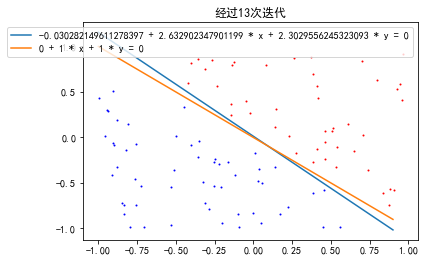

η为0.1时测试错误率为0.00710


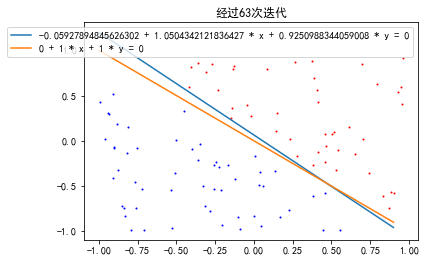

η为0.01时测试错误率为0.00000


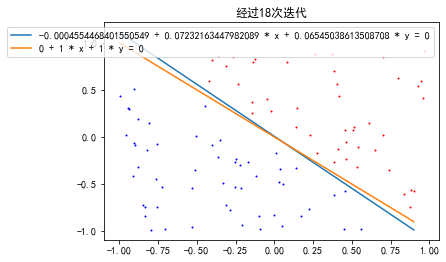

η为0.001时测试错误率为0.00100


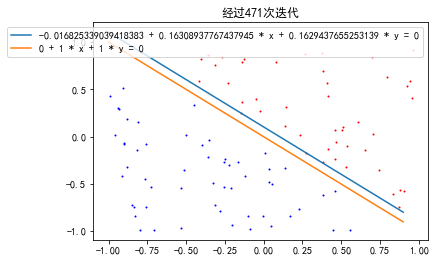

In [7]:
%run codes/problem1.5(a-d).py

##### (e)

$\eta$ 为每次更新的步长，从前面的结果中可以看出，随着 $\eta$ 的减小，错误率先减小再增大，大约在 $\eta=0.01$ 处效果最好。

#### Problem 1.6

Consider a sample of 10 marbles drawn independently from a bin that holds red and green marbles. The probability of a red marble is $\mu$. For $\mu = 0.05, \mu = 0.5,$ and $\mu = 0.8$, compute the probability of getting no red marbles $( \nu = 0)$ in the following cases.

(a) We draw only one such sample. Compute the probability that $\nu = 0$.

(b) We draw 1000 independent samples. Compute the probability that (at least) one of the samples has $\nu = 0$.

(c) Repeat (b) for 1000000 independent samples.

**参考**：

(a) 抽出10个样本，$\nu=0$ 的概率为 $P_0=(1-\mu)^{10}$：

+ 当 $\mu = 0.05$ 时，$P_0=0.5987369392383787$
+ 当 $\mu = 0.5$ 时，$P_0=0.0009765625$
+ 当 $\mu = 0.8$ 时，$P_0=1.0239999999999978 \times 10^{-7}$

(b) 重复(a)1000次，至少有一次出现 $\nu=0$ 的概率为 $P_1=1-(1-P_0)^{1000}$

+ 当 $\mu = 0.05$ 时，$P_1=1.0$
+ 当 $\mu = 0.5$ 时，$P_1=0.623576201943276$
+ 当 $\mu = 0.8$ 时，$P_1=0.00010239476257623004$

(c) 重复(a)1000000次，至少有一次出现 $\nu=0$ 的概率为 $P_2=1-(1-P_0)^{1000000}$

+ 当 $\mu = 0.05$ 时，$P_2=1.0$
+ 当 $\mu = 0.5$ 时，$P_2=1.0$
+ 当 $\mu = 0.8$ 时，$P_2=0.09733159268316072$

#### Problem 1.7

A sample of heads and tails is created by tossing a coin a number of times independently. Assume we have a number of coins that generate different samples independently. For a given coin, let the probability of heads (probability of error) be $\mu$. The probability of obtaining $k$ heads in $N$ tosses of this coin is given by the binomial distribution:

$$
\mathbb P[k|N,\mu]=\binom {N}{k} \mu^k(1-\mu)^{N-k}
$$

Remember that the training error $\nu$ is $\frac {k}{N}$.

(a) Assume the sample size $(N)$ is $10$. If all the coins have $\mu = 0.05$. Compute the probability that at least one coin will have $\nu = 0$ for the case of 1 coin, 1000 coins, 1000000 coins. Repeat for $\mu = 0.8$.

(b) For the case $N = 6$ and $2$ coins with $\mu = 0.5$ for both coins, plot the probability

$$
\mathbb P[{\max}_{i} |\nu_i - \mu_i| >\epsilon]
$$

&emsp; for $\epsilon$ in the range $[0, 1]$ (the $\max$ is over coins). On the same plot show the bound that would be obtained using the Hoeffding Inequality. Remember that for a single coin, the Hoeffding bound is

$$
\mathbb P[|\mu-\nu|>\epsilon] \le 2e^{-2\epsilon^2N}
$$

&emsp; [Hint: Use $\mathbb P[A \ or \ B] = \mathbb  P[A] + \mathbb P[B] - \mathbb P[A\ and\ B] = \mathbb P[A] + \mathbb P[B] - \mathbb P[A] \mathbb P[B]$, where the last equality follows by independence, to evaluate $P[\max ...]$]

**参考**：

(a) 记 $P_i$ 为 $i$ 个硬币至少出现一次 $\nu=0$ 的概率

$$
P_1 = (1-\mu)^{10} \\
P_{1000} = 1-(1-P_1)^{1000} \\
P_{1000000} = 1-(1-P_1)^{1000000}
$$

+ 当 $\mu = 0.05$ 时，$P_1=0.5987369392383787,P_1000=1.0,P_1000000=1.0$
+ 当 $\mu = 0.8$ 时，$P_1=1.0239999999999978 \times 10^{-7},P_1000=0.00010239476257623004,P_1000000=0.09733159268316072$

(b) 注意 $\nu=\frac {k}{N},N=6$ 且有两枚硬币。因此

$$
\begin{aligned}
\mathbb P[{\max}_i |\nu_i - \mu_i| > \epsilon] &= 1-\mathbb P[{\max}_i |\nu_i - \mu_i| \le \epsilon] \\
&= 1-(\mathbb P[|\nu-\mu| \le \epsilon])^2 \\
&= 1-(\mathbb P[|\frac {k}{N} - 0.5| \le \epsilon])^2 \\
&= 1-(\mathbb P[|k-3| \le 6\epsilon])^2 \\
&= 1-(\mathbb P[3-6\epsilon \le k \le 3+6\epsilon])^2 \\
&= 1-\Big( \sum_{3-6\epsilon\le k \le 3+6\epsilon} \binom {N}{k} \mu^k(1-\mu)^{N-k} \Big)^2
\end{aligned}
$$

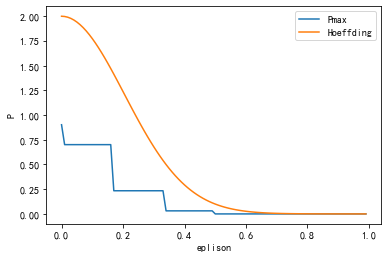

In [8]:
%run codes/problem1.7.py

#### Problem 1.8

The Hoeffding Inequality is one form of the $law \ of \ large \ numbers$. One of the simplest forms of that law is the Chebyshev Inequality, which you will prove here.

(a) If $t$ is a nonnegative random variable, prove that for any $\alpha > 0$, $\mathbb P[t \ge \alpha] \ge \frac {\mathbb E(t)}{\alpha}$

(b) If $u$ is any random variable with mean $\mu$ and variance $\sigma^2$, prove that for any $\alpha > 0,\mathbb P[(u-\mu)^2 \ge \alpha] \le \frac{\sigma^2}{\alpha}$. [Hint: Use (a)]

(c) If $u_1,...,u_N$ are iid random variables, each with mean $\mu$ and variance $\sigma^2$, and $u = \frac {1}{N} \sum_{n=1}^{N}{u_n}$, prove that for any $\alpha > 0$,

$$
\mathbb P[(u-\mu)^2 \ge \alpha] \le \frac{\sigma^2}{N\alpha}
$$

Notice that the RHS of this Chebyshev Inequality goes down linearly in N, while the counterpart in Hoeffding's Inequality goes down exponentially. In Problem 1.9, we develop an exponential bound using a similar approach.

**参考**：

(a)

$$
\begin{aligned}
\mathbb P[t \ge \alpha] &= \int_{\alpha}^{+\infty} f(t)dt \\
&\le \int_{\alpha}^{+\infty} \frac {t}{\alpha} f(t)dt\ (注意t \ge \alpha) \\
&= \frac {\int_{\alpha}^{+\infty} tf(t)dt}{\alpha} \\
&\le \frac {\int_{0}^{+\infty} tf(t)dt}{\alpha} \\
&= \frac {\mathbb E(t)}{\alpha}
\end{aligned}
$$

(b) 在(a)中取 $t=(u-\mu)^2$，注意此处 $u$ 是随机变量，且

$$
\mathbb E(u)=\mu,\text{Var}(u)=\mathbb E(u-\mu)^2=\sigma^2
$$

所以由(a)有

$$
\mathbb P[(u-\mu)^2 \ge \alpha] \le \frac {\mathbb E((u-\mu)^2)}{\alpha} = \frac {\sigma^2}{\alpha}
$$

(c) 由随机变量的性质可得

$$
\mathbb E(u) = \mathbb E(\frac {1}{N} \sum_{n=1}^{N}{u_n}) = \frac {1}{N} \sum_{n=1}^{N}\mathbb E(u_n) = \mu \\
\text{Var}(u) = \text{Var}(\frac {1}{N} \sum_{n=1}^N{u_n}) = \frac {1}{N^2} \text{Var}(\sum_{n=1}^{N}{u_n}) = \frac {1}{N^2} N\sigma^2 = \frac {\sigma^2}{N}
$$

第二行的倒数第二个等号利用了随机变量的独立性。带入(b)可得

$$
\mathbb P[(u-\mu)^2 \ge \alpha] \le \frac{\sigma^2}{N\alpha}
$$

#### Problem 1.9

In this problem, we derive a form of the law of large numbers that has an exponential bound, called the *Cheroﬀ bound*. We focus on the simple case of flipping a fair coin, and use an approach similar to Problem 1.8.

(a) Let $t$ be a (finite) random variable, $\alpha$ be a positive constant, and $s$ be a positive parameter. If $T(s) = \mathbb E_t(e^{st})$, prove that

$$
\mathbb P[t \ge \alpha] \le e^{-s\alpha}T(s)
$$

&emsp; [Hint: $e^{st}$ is monotonicaly increasing in $t$.]

(b) Let $u_1,...,u_N$ be iid random variables, and let $u = \frac {1}{N} \sum_{n=1}^{N}{u_n}$. If $U(s) = \mathbb E_{u_n}(e^{su_n})$ (for any n), prove that

$$
\mathbb P[u \ge \alpha] \le (e^{-s\alpha}U(s))^N
$$

(c) Suppose $\mathbb P[u_n = 0] = \mathbb P[u_n = 1] = \frac {1}{2}$ (fair coin). Evaluate $U(s)$ as a function of $s$, and minimize $e^{-s\alpha}U(s)$ with respect to $s$ for fixed $\alpha, \ 0<\alpha<1$.

(d) Conclude in (c) that, for $0 < \epsilon < \frac {1}{2}$,

$$
\mathbb P[u \ge \mathbb E(u)+\epsilon] \le 2^{-\beta N}
$$

&emsp; where $\beta = 1 + (\frac {1}{2} + \epsilon) \log_2 (\frac {1}{2} + \epsilon) + (\frac {1}{2} - \epsilon) \log_2 (\frac {1}{2} - \epsilon)$ and $\mathbb E(u) = \frac {1}{2}$. Show that ($\beta > 0$, hence the bound is exponentially decreasing in $N$.

**参考**：

(a)

$$
\begin{aligned}
\mathbb P[t \ge \alpha] &= \int_{\alpha}^{+\infty} f(t)dt \\
&\le \int_{\alpha}^{+\infty} \frac {e^{st}}{e^{s\alpha}} f(t)dt \ (注意t \ge \alpha, \ s>0) \\
&= e^{-s\alpha} \int_{\alpha}^{+\infty} e^{st}f(t)dt \\
&\le e^{-s\alpha} \int_{-\infty}^{+\infty} e^{st}f(t)dt \\
&= e^{-s\alpha} \mathbb E_t(e^{st}) \\ &= e^{-s\alpha}T(s)
\end{aligned}
$$

(b)

$$
\begin{aligned}
\mathbb P[u \ge \alpha] &= \mathbb P(\frac {1}{N} \sum_{n=1}^{N}{u_n} \ge \alpha) \\
&= \mathbb P(\sum_{n=1}^{N}{u_n} \ge N\alpha) \\
&\le e^{-sN\alpha} \mathbb E_{Nu}(e^{s\sum_{n=1}^{N}{u_n}}) \ (由(a)) \\
&= e^{-sN\alpha} \prod_{n=1}^{N} E_{u_n}(e^{su_n}) \ (由独立性) \\
&= e^{-sN\alpha} (U(s))^N \\ &= (e^{-s\alpha}U(s))^N
\end{aligned}
$$

(c) 由定义知 

$$
U(s) = \mathbb E_{u_n}(e^{su_n}) = e^{s*0} \mathbb P[u_n = 0]+e^{s*1} \mathbb P[u_n = 1] = \frac {1}{2} e^s+\frac {1}{2}
$$

所以 $f(s)=e^{-s\alpha}U(s)=\frac {1}{2}(e^{(1-\alpha)s}+e^{-s\alpha})$。现在需要对固定的 $\alpha$ 求 $f(s)$ 的最小值

$$
f'(s) = \frac {1}{2} [(1-\alpha)e^{(1-\alpha)s}-\alpha e^{-s\alpha}] \\
f''(s) = \frac {1}{2} [(1-\alpha)^2 e^{(1-\alpha)s}+{\alpha}^2 e^{-s\alpha}] > 0
$$

所以当 $f'(s)=0$ 时，$f(s)$ 取到最小值。令 $f'(s)=0$ 得

$$
\frac {1}{2} [(1-\alpha)e^{(1-\alpha)s}-\alpha e^{-s\alpha}] = 0 \\
e^s = \frac {\alpha}{1-\alpha} \\
s = \ln{(\frac {\alpha}{1-\alpha})}
$$

由于

$$
f(s)=\frac {1}{2}(e^{(1-\alpha)s}+e^{-s\alpha})=\frac {1}{2} e^{-s\alpha}(e^s+1)=\frac {1}{2} (e^s)^{-\alpha}(e^s+1)
$$

所以

$$
\begin{aligned}
\min{f(s)} &= f(\ln{(\frac {\alpha}{1-\alpha})}) \\
&= \frac {1}{2}(\frac {\alpha}{1-\alpha})^{-\alpha}(\frac {\alpha}{1-\alpha}+1) \\
&= \frac {1}{2} \frac {\alpha ^{-\alpha}}{(1-\alpha)^{-\alpha+1}}
\end{aligned}
$$

(d) 因为

$$
\mathbb P[u \ge \alpha] \le (e^{-s\alpha}U(s))^N
$$

对任意 $s$ 均成立，所以由(c)有

$$
\mathbb P[u \ge \alpha] \le \min{(e^{-s\alpha}U(s))^N}=(\frac {1}{2} \frac {\alpha ^{-\alpha}}{(1-\alpha)^{-\alpha+1}})^N
$$

由题有

$$
\mathbb P[u \ge \mathbb E(u)+\epsilon] = \mathbb P[u \ge \frac {1}{2}+\epsilon]
$$

在上述不等式中取 $\alpha = \frac {1}{2} +\epsilon$ 得

$$
\begin{aligned}
P[u \ge \frac {1}{2}+\epsilon] &\le (\frac {1}{2} \frac {(\frac {1}{2}+\epsilon) ^{-(\frac {1}{2}+\epsilon)}}{(\frac {1}{2}-\epsilon)^{\frac {1}{2}-\epsilon}})^N \\
&= 2^{(-1-(\frac {1}{2}+\epsilon) \log_2(\frac {1}{2}+\epsilon)-(\frac {1}{2}-\epsilon) \log_2{(\frac {1}{2}-\epsilon)})N} \\
&= 2^{-\beta N}
\end{aligned}
$$

下面证明 $\beta > 0$，即

$$
\beta = \beta(\epsilon) = 1+(\frac {1}{2}+\epsilon) \log_2(\frac {1}{2}+\epsilon)+(\frac {1}{2}-\epsilon) \log_2(\frac {1}{2}-\epsilon)>0
$$

求导可得

$$
\begin{aligned}
\frac {d \beta}{d \epsilon} &= \log_2(\frac {1}{2}+\epsilon)+1- \log_2(\frac {1}{2}-\epsilon)-1 \\
&= \log_2 \frac {\frac {1}{2}+\epsilon}{\frac {1}{2}-\epsilon} > 0
\end{aligned}
$$

因此 $\beta$ 关于 $\epsilon$ 递增，故 $\beta>\beta(0)=0$

#### Problem 1.10

Assume that $\mathcal X = \{ x_1,x_2,...,x_N,x_{N+1},...,x_{N+M} \}$ and $\mathcal Y = \{ -1,+1 \}$ with an unknown target function $f: \mathcal X \to \mathcal Y$. The training data set $\mathcal D$ is $(x_1 , y_1),...,(x_N, y_N)$. Define the *off-training-set* error of a hypothesis $h$ with respect to $f$ by

$$
E_{oﬀ}(h,f) = \frac {1}{M} \sum_{m=1}^{M} [\![ h(x_{N+m}) \neq f(x_{N+m}) ]\!]
$$

(a) Say $f(x) = +1$ for all $x$ and

$$
h(x) = \begin {cases}
+1, \text{for} \ x = x_k \ \text{and} \ k \ \text{is odd and} \ 1 \le k \le M+N \\
-1, \text{otherwise}
\end {cases}
$$

&emsp; What is $E_{oﬀ}(h, f)$?

(b) We say that a target function $f$ can 'generate' $\mathcal D$ in a noiseless setting if $y_n = f(x_n)$ for all $(x_n, y_n) \in \mathcal D$. For a fixed $\mathcal D$ of size $N$, how many possible $f: \mathcal X \to \mathcal Y$ can generate $\mathcal D$ in a noiseless setting?

(c) For a given hypothesis $h$ and an integer $k$ between $0$ and $M$, how many of those $f$ in (b) satisfy $E_{oﬀ}(h, f)=\frac {k}{M}$?

(d) For a given hypothesis $h$, if all those $f$ that generate $\mathcal D$ in a noiseless setting are equally likely in probability, what is the expected off trainingset error $\mathbb E_f[E_{oﬀ}(h, f)]$?

(e) A deterministic algorithm $A$ is defined as a procedure that takes $\mathcal D$ as an input, and outputs a hypothesis $h = A(\mathcal D)$. Argue that for any two deterministic algorithms $A_1$ and $A_2$

$$
\mathbb E_f[E_{oﬀ}(A_1(D), f)] = \mathbb E_f[E_{oﬀ}(A_2(D), f)]
$$

&emsp; You have now proved that in a noiseless setting, for a fixed $\mathcal D$, if all possible $f$ are equally likely, any two deterministic algorithms are equivalent in terms of the expected off training set error. Similar results can be proved for more general settings.

**参考**：

(a) 由题可知 $E_{oﬀ}(h, f) = \frac {1}{M} \sum_{m=1}^{M} [\![ (N+m)被2整除] \!]$，又易知从 $1$ 到 $N$ 中被2整除的正整数有 $\lfloor \frac {N}{2} \rfloor$ 个，因此

$$
E_{oﬀ}(h, f) = \frac {1}{M} [(1到N+M中被2整除的数的个数)-(1到N中被2整除的数的个数)]
= \frac {1}{M} (\lfloor \frac {N+M}{2} \rfloor - \lfloor \frac {N}{2} \rfloor)
$$

(b) 由题知 $f$ 在训练集 $\mathcal D$ 上没有误差，所以 $f$ 在 $\{ x_{N+1},...,x_{N+M} \}$ 上的取值就任意了，每个点有两种取值，所以一共有 $2^M$ 种可以拟合的 $f$。

(c) 一共有 $M$ 个点，有 $k$ 个点和目标函数不同，所以共有 $C_M^k$ 种

(d) 由题知每个在训练集上无噪声的目标函数 $f$ 出现的概率相同，所以这些 $f$ 在测试集上每个点出现错误的概率也相同，那么由(c)以及(d)可知

$$
\begin{aligned}
\mathbb E_f[E_{oﬀ}(h, f)] &= \sum_{k=0}^{M} \frac {k}{M} \frac {C_M^k}{2^M} \\
&= \frac {\sum_{k=0}^{M} kC_{M}^{k}}{M2^M} \\
&= \frac {\sum_{k=1}^{M} MC_{M-1}^{k-1}}{M2^M} \\
&= \frac {2^{M-1}}{2^M} \\ &= \frac {1}{2}
\end{aligned}
$$

注意这里用到了 $kC_{n}^{k}=nC_{n-1}^{k-1}$

(e) 由(d)可知，使用算法 $A_1$ 和算法 $A_2$ 得到的假设的误差期望均为 $\frac {1}{2}$。所以结论成立


#### Problem 1.11

The matrix which tabulates the cost of various errors for the CIA and Supermarket applications in Example 1.1 is called a *risk* or *loss matrix*.

For the two risk matrices in Example 1.1, explicitly write down the in sample error $E_{\text{in}}$ that one should minimize to obtain $g$. This in-sample error should weight the different types of errors based on the risk matrix. [Hint: Consider $y_n = +1$ and $y_n = -1$ separately.]

**参考**：

这里假设有 $N$ 个样本，那么对于Suptermarket：

$$
\begin{aligned}
E_{\text{in}} &= \frac {1}{N} \sum_{i=1}^{N}(10 \times [\![ h(x_i)=-1 \&\ f(x_i)=1] \!]+1 \times [\![ h(x_i)=1 \&\ f(x_i)=-1 ]\!])
\end{aligned}
$$

对于CIA：

$$
\begin{aligned}
E_{\text{in}} &= \frac {1}{N} \sum_{i=1}^{N}(1 \times [\![ h(x_i)=-1 \&\ f(x_i)=1] \!]+1000 \times [\![ h(x_i)=1 \&\ f(x_i)=-1 ]\!])
\end{aligned}
$$

#### Problem 1.12

This problem investigates how changing the error measure can change the result of the learning process. You have $N$ data points $y_1 \le ... \le y_N$ and wish to estimate a 'representative' value.

(a) If your algorithm is to find the hypothesis $h$ that minimizes the in sample sum of squared deviations,

$$
E_{\text{in}}(h) = \sum_{n=1}^{N} (h - y_n)^2,
$$

&emsp; then show that your estimate will be the in sample mean,

$$
h_{\text{mean}} = \frac {1}{N} \sum_{n=1}^{N} y_n
$$

(b) If your algorithm is to find the hypothesis $h$ that minimizes the in samples sum of absolute deviations,

$$
E_{\text{in}}(h) = \sum_{n=1}^{N} |h - y_n|
$$

&emsp; then show that your estimate will be the in sample median $h_{\text{med}}$, which is any value for which half the data points are at most $h_{\text{med}}$ and half the data points are at least $h_{\text{med}}$.

(c) Suppose $y_N$ is perturbed to $y_N + \epsilon$, where $\epsilon \to \infty$. So, the single data point $y_N$ becomes an outlier. What happens to your two estimators $h_{\text{mean}}$ and $h_{\text{med}}$?

**参考**：

(a) 将误差关于 $h$ 求导可得

$$
E'_{\text{in}}(h) = 2\sum_{n=1}^{N} (h - y_n) \\
E''_{\text{in}}(h) = 2N > 0
$$

所以 $E_{\text{in}}(h)$ 在 $E'_{\text{in}}(h)=0$ 处取极小值，可以求得

$$
h = h_{\text{mean}} = \frac {1}{N} \sum_{n=1}^{N} y_n
$$

(b) 这题证明一个一般结论：

假设随机变量 $x$ 的概率密度函数为 $f(x)$，则使得 $F(a)=\int_{-\infty}^{+\infty} |x-a|f(x)dx$ 达到最小值的 $a$ 满足 $\int_{-\infty}^{a} f(x)dx=\frac {1}{2}$，即 $a$ 为该分布的中位数 $x_{\text{med}}$。

证明：

首先

$$
F(a) = \int_{-\infty}^{a} (a-x)f(x)dx + \int_{a}^{+\infty} (x-a)f(x)dx
$$

那么关于 $a$ 求导得

$$
F'(a) = \int_{-\infty}^{a} f(x)dx - \int_{a}^{+\infty} f(x)dx \\
F''(a) = 2f(a) \ge 0
$$

所以 $F(a)$ 在 $F'(a)=0$ 处取最小值，即在 $\int_{-\infty}^{a} f(x)dx=\int_{a}^{+\infty} f(x)dx=\frac {1}{2}$ 处取最小值，因为 $\int_{-\infty}^{a} f(x)dx+\int_{a}^{+\infty} f(x)dx=1$，所以 $F(a)$ 在 $a=x_{\text{med}}$ 处取到最小值（离散分布同理可得）。

回到原题，现在构造一个分布，使得 $P(y=y_i)=\frac {1}{N}(i=1,2,...,N)$，所以

$$
F(h)=\frac {1}{N} E_{\text{in}}(h) = \frac {1}{N} \sum_{n=1}^{N} |h - y_n|
$$

因此前述结论可知 $E_{\text{in}}(h)$ 在 $h=y_{\text{med}}$ 取最小值，即 $h_{\text{med}}=y_{\text{med}}$

(c) 当 $y_N$ 因噪声变为 $y_N + \epsilon, \ (\epsilon \to \infty)$ 时，由定义可知 $h_{\text{mean}} \to \infty$，而 $y_{\text{med}}$ 为中位数，则不会有太大变化，因为元素的相对次序不变，只有 $y_N$ 变了。